## Census Income

Задача состоит в том, чтобы предсказать превышает ли доход человека 50K долларов в год, испльзуя для этого данные переписи. Признаки из периписи и значения, которые они могут принимать:

* age: continuous  
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked  
* fnlwgt: continuous  
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool 
* education-num: continuous
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse  
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male  
* capital-gain: continuous  
* capital-loss: continuous  
* hours-per-week: continuous  
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands  
* income: <=50K, >50K


###  Подготовка

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [81]:
data = pd.read_csv('adult.csv')

In [82]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [83]:
data.sample(6)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11116,52,Self-emp-inc,254211,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,60,United-States,>50K
4934,25,Private,297154,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,2407,0,40,United-States,<=50K
5268,22,State-gov,186569,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,12,United-States,<=50K
21093,36,Local-gov,197495,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K
24919,39,Private,333305,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,45,United-States,>50K
18653,35,Private,240389,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,43,United-States,>50K


In [84]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [85]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [86]:
data.select_dtypes(include = 'object').nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
income             2
dtype: int64

In [87]:
data.shape

(32561, 15)

In [88]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Выборка несбалансированная

In [89]:
data['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

### Пропущенные значения

На первый взгляд пропущенных значений нет.

In [90]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Посмотрим на уникальные значение в категориальных признаках

In [91]:
for i in data.select_dtypes(include = 'object').columns:
    print(i.upper(), ": ")
    print(data[i].unique())

WORKCLASS : 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
EDUCATION : 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
MARITAL-STATUS : 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
OCCUPATION : 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
RELATIONSHIP : 
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
RACE : 
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
SEX : 
[' Male' ' Female']
NATIVE-COUNTRY : 
[' United-States' ' Cub

Заметим, что в признаках workclass, occupation, native-country есть пропущенные значения обозначенные как " ?". Посмотрим сколько их всего в выборке

In [92]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [93]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [94]:
data['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Пропущенных значений слишком много, чтобы выбрасывать их из выборки

### Поиск закономерностей

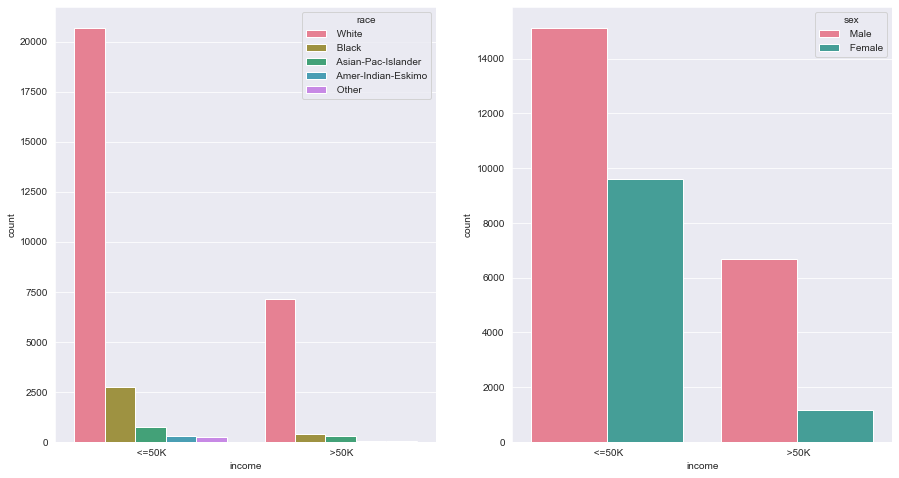

In [95]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2, figsize = (15,8))
for i, col in enumerate(['race', 'sex']):
    sns.countplot(ax = axes[i], x = 'income', data = data, hue = col, palette = 'husl')

<AxesSubplot:xlabel='income', ylabel='count'>

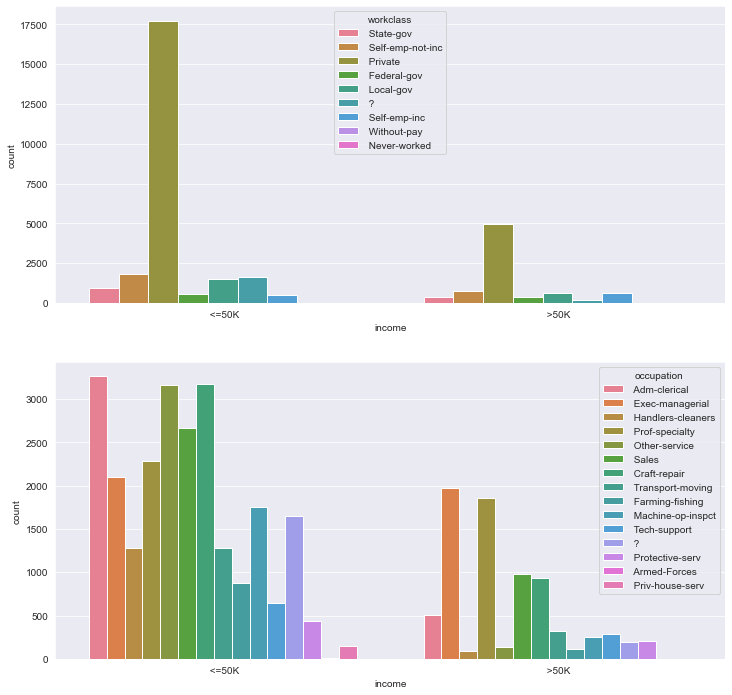

In [96]:
fig, axes = plt.subplots(2,1, figsize = (12,12))
sns.countplot(ax = axes[0], x = 'income', data = data, hue = 'workclass', palette = 'husl')
sns.countplot(ax = axes[1], x = 'income', data = data, hue = 'occupation', palette = 'husl')

<AxesSubplot:xlabel='income', ylabel='count'>

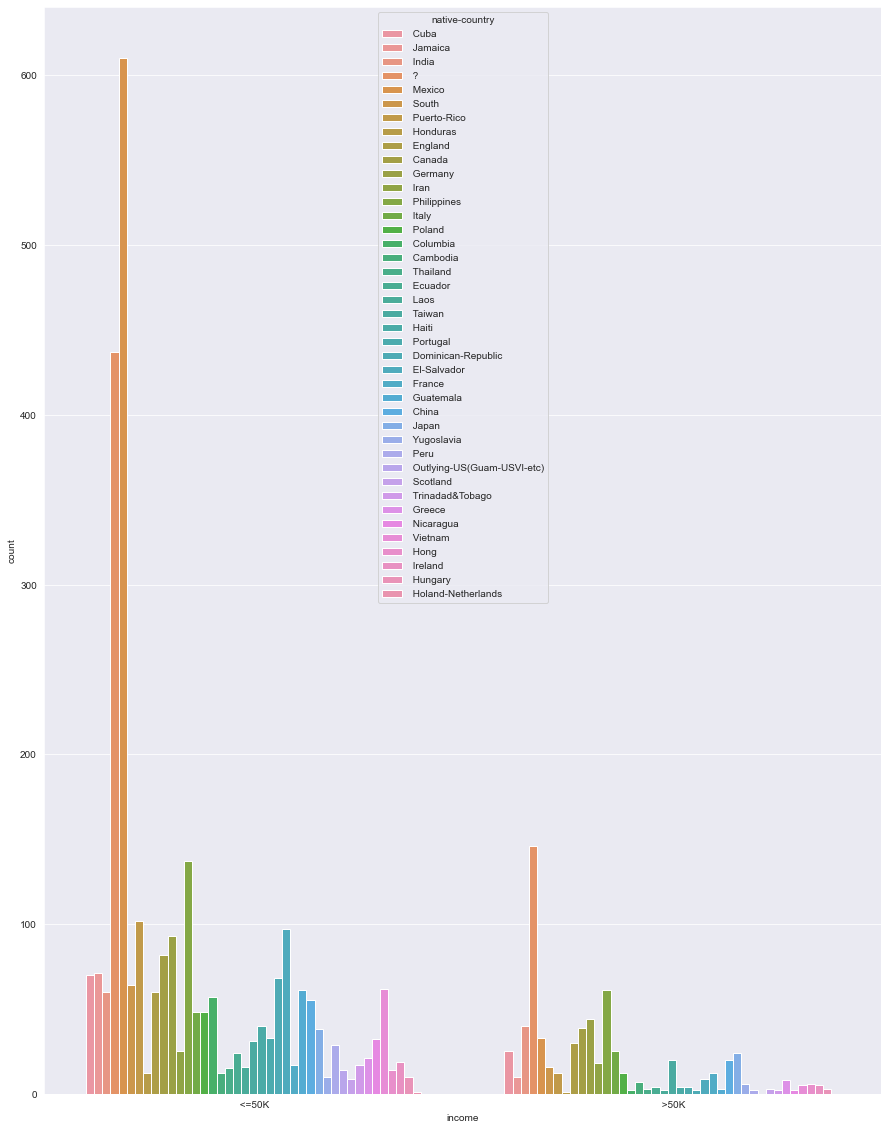

In [97]:
plt.figure(figsize = (15,20))
df = data.drop(data[data['native-country'] == ' United-States'].index)
sns.countplot(x = 'income', data = df, hue = 'native-country')

### Замена пропущенных данных

Поробуем заменить неизвестные категории наиболее популярной категорией в признаке.

In [98]:
data['workclass'] = data['workclass'].replace(" ?", ' Private')
data['occupation'] = data['occupation'].replace(" ?", ' Prof-specialty')
data['native-country'] = data['native-country'].replace(" ?", ' United-States')

### Работа с признаками

Объединение категорий похожих по смыслу в одну

In [99]:
data['marital-status']= data['marital-status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'Married')
data['marital-status']= data['marital-status'].replace([' Divorced', ' Separated',' Widowed', ' Married-spouse-absent'], 'Single')

In [100]:
data['education']= data['education'].replace([' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th',' 10th', ' 11th', ' 12th'], 'school')
data['education'] = data['education'].replace([' Assoc-voc', ' Assoc-acdm', ' Prof-school', ' Some-college'], 'Higher_eduction')

Целевая переменная

In [101]:
data['income'] = data['income'].map({' <=50K': 0, ' >50K': 1})

### RandomForest

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [128]:
y = data['income']
X = data.drop(columns = ['income'])

In [129]:
categorical = X.select_dtypes(include = 'object').columns
numeric = X.select_dtypes(include = 'int64').columns

In [139]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 777)
ct = ColumnTransformer([('ohe', OneHotEncoder(), categorical)], remainder = 'passthrough')
pipe = Pipeline([('ct', ct),('model', RandomForestClassifier())])

In [140]:
%%time
pipe.fit(x_train, y_train)

Wall time: 13.1 s


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [141]:
y_pred = pipe.predict(x_test)

In [142]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

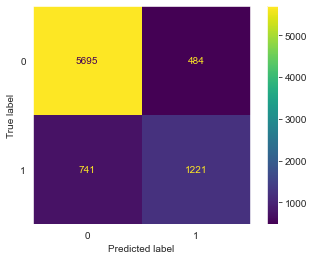

In [143]:
sns.set_style("dark")
plot_confusion_matrix(pipe, x_test, y_test)

In [144]:
confusion_matrix(y_test, y_pred)

array([[5695,  484],
       [ 741, 1221]], dtype=int64)

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6179
           1       0.72      0.62      0.67      1962

    accuracy                           0.85      8141
   macro avg       0.80      0.77      0.78      8141
weighted avg       0.84      0.85      0.85      8141



### XGBoost

In [148]:
import xgboost as xgb 

In [149]:
#default parameters
params = {'n_estimators': 100,
          'learning_rate': 0.1,
          'max_depth': 3,
          'min_child_weight': 1,
          'subsample': 1,
          'colsample_bytree': 1,
          'n_jobs': 4}


In [159]:
model = xgb.XGBClassifier(**params)
pipe = Pipeline([('ct', ct),('model', model)])

In [160]:
pipe.fit(x_train, y_train)

C:\Users\Artem\anaconda3\envs\For Data\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=

In [161]:
y_pred = pipe.predict(x_test)

In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6179
           1       0.80      0.59      0.68      1962

    accuracy                           0.86      8141
   macro avg       0.84      0.77      0.80      8141
weighted avg       0.86      0.86      0.86      8141



### Подбор параметров для XGBoost

In [173]:
y = data['income']
X = data.drop(columns = ['income'])

In [174]:
X = pd.get_dummies(X, columns = categorical)

In [175]:
X.shape

(32561, 91)

In [176]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 777)

In [177]:
params = {'n_estimators': 100,
          'learning_rate': 0.1,
          'max_depth': 5,
          'min_child_weight': 1,
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'n_jobs': 4}

In [178]:
model = xgb.XGBClassifier(**params)
model.fit(x_train, y_train, eval_metric='auc', eval_set=[[x_train, y_train], [x_test, y_test]])

[0]	validation_0-auc:0.88563	validation_1-auc:0.88326
[1]	validation_0-auc:0.89561	validation_1-auc:0.89446
[2]	validation_0-auc:0.90009	validation_1-auc:0.89796
[3]	validation_0-auc:0.90237	validation_1-auc:0.90056
[4]	validation_0-auc:0.90458	validation_1-auc:0.90248
[5]	validation_0-auc:0.90574	validation_1-auc:0.90348


C:\Users\Artem\anaconda3\envs\For Data\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[6]	validation_0-auc:0.90713	validation_1-auc:0.90470
[7]	validation_0-auc:0.90743	validation_1-auc:0.90558
[8]	validation_0-auc:0.90885	validation_1-auc:0.90667
[9]	validation_0-auc:0.90941	validation_1-auc:0.90741
[10]	validation_0-auc:0.91014	validation_1-auc:0.90812
[11]	validation_0-auc:0.91102	validation_1-auc:0.90884
[12]	validation_0-auc:0.91179	validation_1-auc:0.90945
[13]	validation_0-auc:0.91195	validation_1-auc:0.90967
[14]	validation_0-auc:0.91229	validation_1-auc:0.90980
[15]	validation_0-auc:0.91419	validation_1-auc:0.91131
[16]	validation_0-auc:0.91473	validation_1-auc:0.91137
[17]	validation_0-auc:0.91497	validation_1-auc:0.91180
[18]	validation_0-auc:0.91535	validation_1-auc:0.91197
[19]	validation_0-auc:0.91570	validation_1-auc:0.91244
[20]	validation_0-auc:0.91636	validation_1-auc:0.91277
[21]	validation_0-auc:0.91704	validation_1-auc:0.91326
[22]	validation_0-auc:0.91756	validation_1-auc:0.91357
[23]	validation_0-auc:0.91788	validation_1-auc:0.91394
[24]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [179]:
y_pred = model.predict(x_test)

In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6179
           1       0.79      0.64      0.71      1962

    accuracy                           0.87      8141
   macro avg       0.84      0.79      0.81      8141
weighted avg       0.87      0.87      0.87      8141



In [192]:
params = {'n_estimators': 170,
          'learning_rate': 0.15,
          'max_depth': 5,
          'min_child_weight': 1,
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'n_jobs': 4}

model = xgb.XGBClassifier(**params)
model.fit(x_train, y_train, eval_metric='auc', eval_set=[[x_train, y_train], [x_test, y_test]])

[0]	validation_0-auc:0.88563	validation_1-auc:0.88326
[1]	validation_0-auc:0.89968	validation_1-auc:0.89862
[2]	validation_0-auc:0.90043	validation_1-auc:0.89871
[3]	validation_0-auc:0.90359	validation_1-auc:0.90125
[4]	validation_0-auc:0.90553	validation_1-auc:0.90332
[5]	validation_0-auc:0.90700	validation_1-auc:0.90515
[6]	validation_0-auc:0.90863	validation_1-auc:0.90679
[7]	validation_0-auc:0.90993	validation_1-auc:0.90877
[8]	validation_0-auc:0.91081	validation_1-auc:0.90905
[9]	validation_0-auc:0.91155	validation_1-auc:0.90894
[10]	validation_0-auc:0.91255	validation_1-auc:0.91033
[11]	validation_0-auc:0.91415	validation_1-auc:0.91126
[12]	validation_0-auc:0.91509	validation_1-auc:0.91223
[13]	validation_0-auc:0.91629	validation_1-auc:0.91301
[14]	validation_0-auc:0.91677	validation_1-auc:0.91356
[15]	validation_0-auc:0.91801	validation_1-auc:0.91475
[16]	validation_0-auc:0.91877	validation_1-auc:0.91541
[17]	validation_0-auc:0.91937	validation_1-auc:0.91558
[18]	validation_0-au

[149]	validation_0-auc:0.94994	validation_1-auc:0.92952
[150]	validation_0-auc:0.95003	validation_1-auc:0.92957
[151]	validation_0-auc:0.95015	validation_1-auc:0.92956
[152]	validation_0-auc:0.95028	validation_1-auc:0.92957
[153]	validation_0-auc:0.95044	validation_1-auc:0.92953
[154]	validation_0-auc:0.95055	validation_1-auc:0.92953
[155]	validation_0-auc:0.95067	validation_1-auc:0.92949
[156]	validation_0-auc:0.95071	validation_1-auc:0.92951
[157]	validation_0-auc:0.95078	validation_1-auc:0.92958
[158]	validation_0-auc:0.95084	validation_1-auc:0.92952
[159]	validation_0-auc:0.95095	validation_1-auc:0.92964
[160]	validation_0-auc:0.95100	validation_1-auc:0.92971
[161]	validation_0-auc:0.95110	validation_1-auc:0.92971
[162]	validation_0-auc:0.95127	validation_1-auc:0.92970
[163]	validation_0-auc:0.95134	validation_1-auc:0.92966
[164]	validation_0-auc:0.95140	validation_1-auc:0.92969
[165]	validation_0-auc:0.95153	validation_1-auc:0.92964
[166]	validation_0-auc:0.95164	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=170, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [193]:
y_pred = model.predict(x_test)

In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6179
           1       0.78      0.67      0.72      1962

    accuracy                           0.87      8141
   macro avg       0.84      0.80      0.82      8141
weighted avg       0.87      0.87      0.87      8141



### Подбор по сетке

Описываем функцию, возвращающую наилучшие параметры

In [198]:
def find_params(model, param_grid):
    model = GridSearchCV(model, param_grid, scoring='roc_auc', cv=[(np.arange(len(x_train)),
                                                               np.arange(len(x_test)) + len(x_train))], verbose=3)

    model.fit(pd.concat([x_train, x_test]).values, pd.concat([y_train, y_test]).values)
    best_params = model.best_estimator_.get_params()
    print('Best test ROC AUC: ', clf.best_score_)
    print('Best params: ', best_params)
    return best_params

In [204]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier(**params, use_label_encoder=False)

param_grid = {
    'max_depth': [3, 5, 10],
    'min_child_weight': [7,10,13]#[1, 5, 10]
}

best_params = find_params(model, param_grid)

Fitting 1 folds for each of 9 candidates, totalling 9 fits
[21:35:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/1] END ................max_depth=3, min_child_weight=7; total time=   1.5s
[21:35:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/1] END ...............max_depth=3, min_child_weight=10; total time=   1.4s
[21:35:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/1] END ..........

In [209]:
model = xgb.XGBClassifier(**best_params)

param_grid = {
    'subsample': np.linspace(0.5, 1, 6),
    'colsample_bytree': np.linspace(0.5, 1, 6)
}

best_params = find_params(model, param_grid)

Fitting 1 folds for each of 36 candidates, totalling 36 fits
[18:13:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/1] END ............colsample_bytree=0.5, subsample=0.5; total time=   1.9s
[18:13:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/1] END ............colsample_bytree=0.5, subsample=0.6; total time=   1.8s
[18:13:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/1] END ........

[CV 1/1] END ............colsample_bytree=0.9, subsample=0.5; total time=   2.9s
[18:14:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/1] END ............colsample_bytree=0.9, subsample=0.6; total time=   2.8s
[18:14:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/1] END ............colsample_bytree=0.9, subsample=0.7; total time=   2.6s
[18:14:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[